In [1]:
#pip install pandas matplotlib seaborn wordcloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [1]:
pip install pandas matplotlib seaborn wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 3.0 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.0 MB 3.0 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.0 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.0 MB 3.0 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.0 MB 2.9 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.0 MB 3.1 MB/s eta 0:00:03
   -------------------- ------------------- 5.5/11.0 MB 3.4 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.0 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 3.5 MB/s eta 0:00:02
   ----


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Teju\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
df = pd.read_csv(r"C:\Users\Teju\Downloads\twitter_training.csv", header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df.head()


,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


C:\Users\priya\AppData\Local\Temp\ipykernel_20056\2709897239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


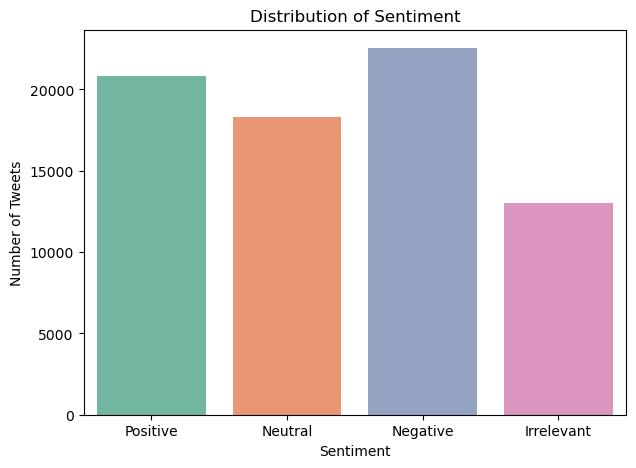

In [4]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


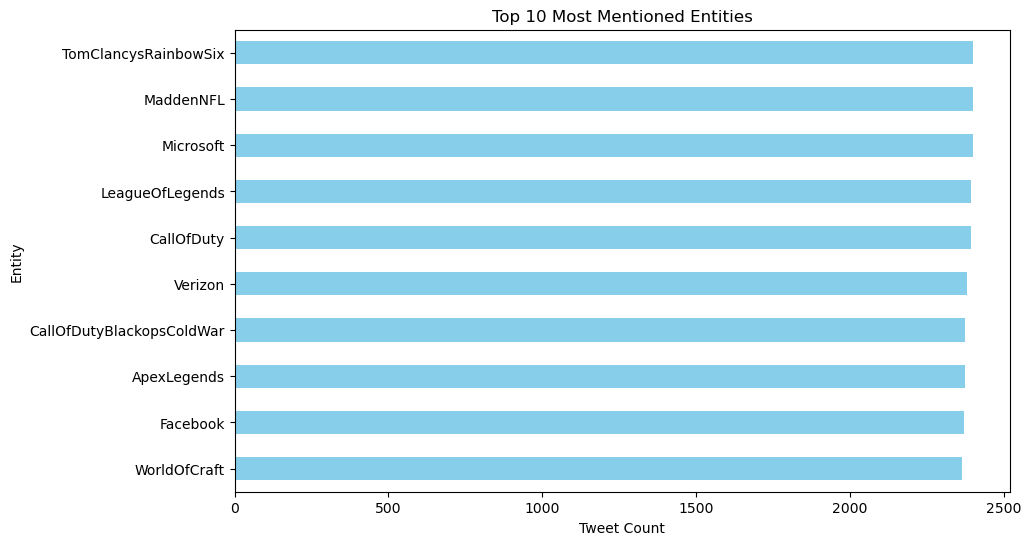

In [5]:
plt.figure(figsize=(10, 6))
df['Entity'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Most Mentioned Entities")
plt.xlabel("Tweet Count")
plt.gca().invert_yaxis()
plt.show()


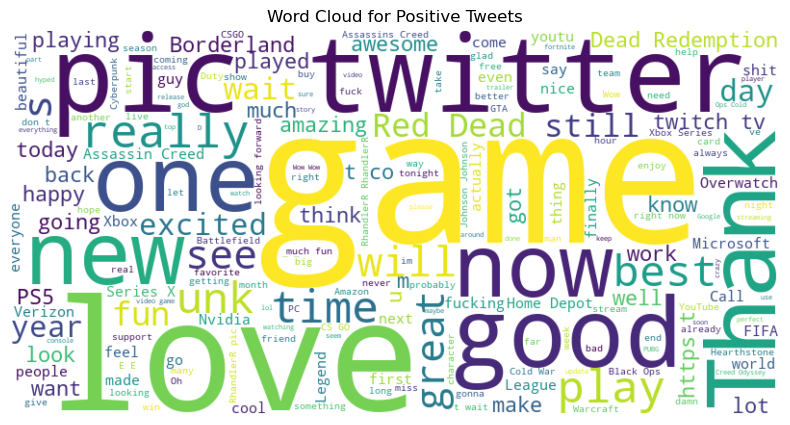

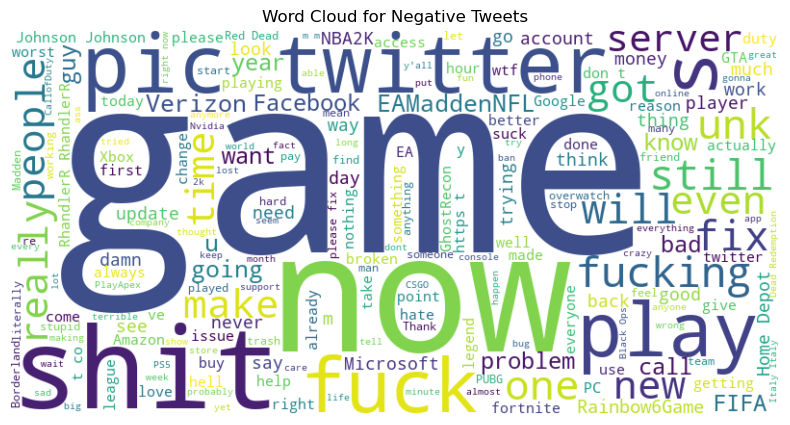

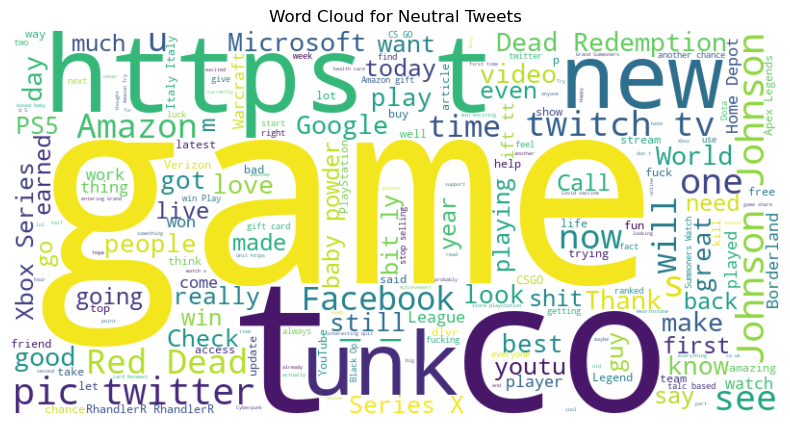

In [6]:
def generate_wordcloud(sentiment):
    # Convert to string and drop NaN
    tweets = df[df['Sentiment'] == sentiment]['Tweet'].dropna().astype(str)
    text = " ".join(tweets)

    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()

# Generate word clouds for each sentiment
generate_wordcloud("Positive")
generate_wordcloud("Negative")
generate_wordcloud("Neutral")


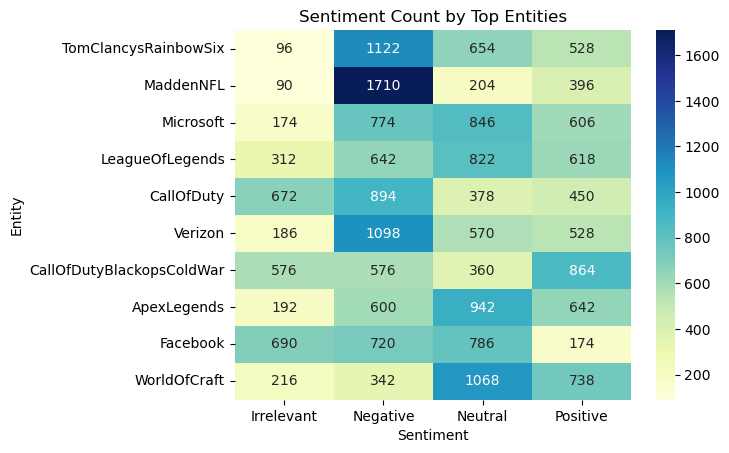

In [7]:
crosstab = pd.crosstab(df['Entity'], df['Sentiment'])
top_entities = df['Entity'].value_counts().head(10).index
sns.heatmap(crosstab.loc[top_entities], annot=True, fmt="d", cmap="YlGnBu")
plt.title("Sentiment Count by Top Entities")
plt.ylabel("Entity")
plt.xlabel("Sentiment")
plt.show()
